### Task:

#### Martin Luther king Junior's famous speech  summarisation with nltk by weighted frequency of occurrence and a neat little visualisation 

In this notebook, I am going to do Text summarization which is a subdomain of Natural Language Processing (NLP) that deals with extracting summaries from huge chunks of texts. In this, I am taking the famous speech of Martin Luther King Jr. which is one of my favorites, pulling it from a website, clean it and will apply some of basic NLP tools. I will also do a little visualization in the end for some of the most frequent words(except StopWords) used in the speech. 

In [1]:
from bs4 import BeautifulSoup as bs4
import requests
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords

I will pull and parse the text of the speech from a website using beautiful Soup 

In [2]:
link='http://www.analytictech.com/mb021/mlk.htm'
req=requests.get(link)
soup=bs4(req.content)
p_tags = soup.find_all('p')

speech_text=[]
for tag in p_tags:
    tag=tag.get_text()
    tag=tag.rstrip('\n')
    speech_text.append(tag)

speech_text= [x.replace("\r\n"," ") for x in speech_text]
speech_text=''.join(speech_text)
speech_text

'I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. Five score years ago a great American in whose symbolic shadow we stand today signed the Emancipation Proclamation. This momentous decree came as a great beckoning light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. But one hundred years later the Negro is still not free. One hundred years later the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later the Negro is still languishing in the comers of American society and finds himself in exile in his own land. We all have come to this hallowed spot to remind America of the fierce urgency

In [3]:
len(speech_text)

4806

#### Tokenizing
----Tokenization in NLP is the process by which a large quantity of text is divided into smaller parts called tokens.

I am using NLTK to tokenize my text in two different ways; by word, and by sentence.

In [4]:
tokenizer = RegexpTokenizer('\w+')

words = tokenizer.tokenize(speech_text)   #tokenizing by words
sentences = nltk.sent_tokenize(speech_text)   #tokenizing by sentence

#### Finding Weighted frequency occurrence of words


In NLTK, there's a class called FreqDist which is used to encode “frequency distributions”, a frequency distribution could be used to record the frequency of each word type in a text document.

In [5]:
frequency_words = nltk.FreqDist(words)   
max_frequency = max(frequency_words.values())

print('Word',' frequency\n')
for k,v in frequency_words.items():
    print(k,'::',v)

Word  frequency

I :: 12
am :: 1
happy :: 1
to :: 29
join :: 3
with :: 9
you :: 2
today :: 7
in :: 17
what :: 1
will :: 16
go :: 3
down :: 2
history :: 2
as :: 4
the :: 54
greatest :: 1
demonstration :: 1
for :: 4
freedom :: 13
of :: 49
our :: 7
nation :: 4
Five :: 1
score :: 1
years :: 5
ago :: 1
a :: 20
great :: 2
American :: 3
whose :: 1
symbolic :: 1
shadow :: 1
we :: 11
stand :: 2
signed :: 1
Emancipation :: 1
Proclamation :: 1
This :: 3
momentous :: 1
decree :: 1
came :: 2
beckoning :: 1
light :: 1
hope :: 3
millions :: 1
Negro :: 8
slaves :: 2
who :: 1
had :: 1
been :: 1
seared :: 1
flames :: 1
withering :: 1
injustice :: 3
It :: 2
joyous :: 1
daybreak :: 1
end :: 1
long :: 1
night :: 1
their :: 5
captivity :: 1
But :: 2
one :: 9
hundred :: 4
later :: 4
is :: 11
still :: 4
not :: 5
free :: 3
One :: 3
life :: 1
sadly :: 1
crippled :: 1
by :: 4
manacles :: 1
segregation :: 2
and :: 24
chains :: 1
discrimination :: 1
lives :: 1
on :: 3
lonely :: 1
island :: 1
poverty :: 1
midst :: 

#### weighted frequency of every word

Now, to find the weightage frequency of every word, and since the word "the" has the highest frequency of 54, thus the weighted frequency of all the words will be calculated by dividing their number of occurances by 54.

In [6]:
for word in frequency_words.keys():
    frequency_words[word] = frequency_words[word]/max_frequency 

print('Word','  Weighted frequency of occurrence\n')
for k,v in frequency_words.items():
    print(k,':',v)

Word   Weighted frequency of occurrence

I : 0.2222222222222222
am : 0.018518518518518517
happy : 0.018518518518518517
to : 0.5370370370370371
join : 0.05555555555555555
with : 0.16666666666666666
you : 0.037037037037037035
today : 0.12962962962962962
in : 0.3148148148148148
what : 0.018518518518518517
will : 0.2962962962962963
go : 0.05555555555555555
down : 0.037037037037037035
history : 0.037037037037037035
as : 0.07407407407407407
the : 1.0
greatest : 0.018518518518518517
demonstration : 0.018518518518518517
for : 0.07407407407407407
freedom : 0.24074074074074073
of : 0.9074074074074074
our : 0.12962962962962962
nation : 0.07407407407407407
Five : 0.018518518518518517
score : 0.018518518518518517
years : 0.09259259259259259
ago : 0.018518518518518517
a : 0.37037037037037035
great : 0.037037037037037035
American : 0.05555555555555555
whose : 0.018518518518518517
symbolic : 0.018518518518518517
shadow : 0.018518518518518517
we : 0.2037037037037037
stand : 0.037037037037037035
signed 

happens : 0.018518518518518517
village : 0.018518518518518517
hamlet : 0.018518518518518517
city : 0.018518518518518517
speed : 0.018518518518518517
Jews : 0.018518518518518517
Gentiles : 0.018518518518518517
Protestants : 0.018518518518518517
Catholics : 0.018518518518518517
sing : 0.018518518518518517
old : 0.018518518518518517
spiritual : 0.018518518518518517
Free : 0.037037037037037035
last : 0.05555555555555555
Thank : 0.018518518518518517
almighty : 0.018518518518518517
re : 0.018518518518518517


 'the' has the maximum weighted frequency i.e. 1
 
 So I have calculated the weighted frequencies for all the words

#### Now I will calculate sentence scores

----- The score for sentences is calculated by adding weighted frequencies of all the words that occured in that particular sentence. Since I do not want very long sentences in the summary, I will only consider those sentences which are of less than 30 words.

In [7]:
sentence_scores = dict() 
for sent in sentences:
    if len(sent.split(' ')) < 30:
        for word in nltk.word_tokenize(sent.lower()):
            if word in frequency_words.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = frequency_words[word]
                else:
                    sentence_scores[sent] += frequency_words[word]
# for k,v in sentence_scores.items():
#     print(k,'::',v)

### Summary

To summarize the speech(text), I will take top n sentences with the highest scores. 
The following script retrieves top 6 sentences and prints them.

In [8]:
import heapq
summary_sentences = heapq.nlargest(6, sentence_scores, key=sentence_scores.get)

summary = ''.join(summary_sentences)
print(f"The following is the summarised version of the speech:\n\n",summary)

The following is the summarised version of the speech:

 One hundred years later the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination.Now is the time to rise from the dark and desolate valley of segregation to the sunlit path of racial justice.One hundred years later the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity.With this faith we will be able to hew out of the mountain of despair a stone of hope.I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.This momentous decree came as a great beckoning light of hope to millions of Negro slaves who had been seared in the flames of withering injustice.


#### Now we will see visualization of 30 most frequent words (except stopWords defined in nltk.corpus) present in the text of speech considered.

I will use heapq to pull the 30 most-common words and these will get fed into WordCloud to generate an image.

In [9]:
stopWords = set(stopwords.words("english"))
vizual_words = [i for i in words if i not in stopWords] 

vizual_frequency = nltk.FreqDist(vizual_words)
cloud = heapq.nlargest(30, vizual_frequency, key=vizual_frequency.get)

In [10]:
import matplotlib.pyplot as plt

In [11]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(17, 12))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.savefig('wordcloud.png');

In [12]:
from wordcloud import WordCloud, STOPWORDS

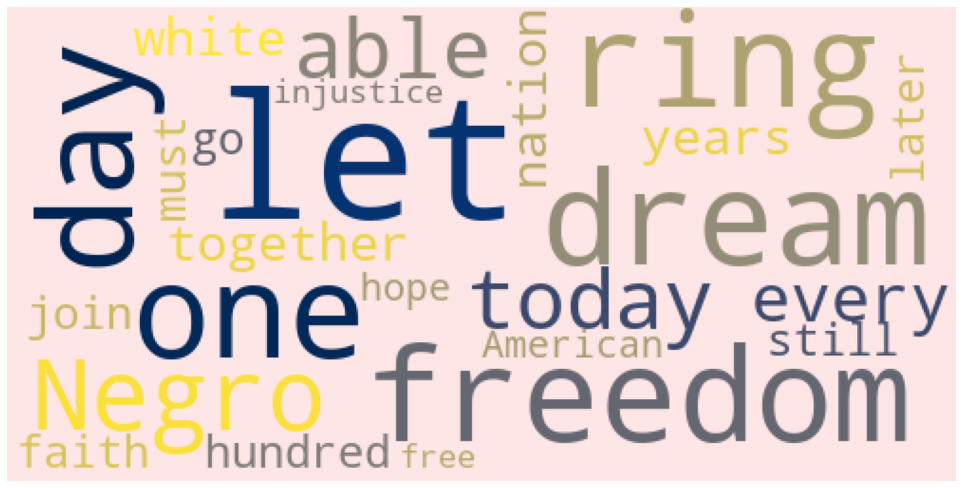

In [13]:
wordcloud = WordCloud(width=500, height=250, random_state=1, 
                      background_color='#ffe6e6', colormap='cividis',
                      collocations=False, stopwords=STOPWORDS).generate(' '.join(cloud))

plot_cloud(wordcloud)